### loading dataset

In [14]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)

data = pd.read_csv(r'..\3. eda_n_feature engineering\5.1 FEed furnishDetails col.csv')
data.head(3)

,property_name,sector,society,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,address,floorNum,facing,agePossession,nearbyLocations,description,features,rating,property_type,noOfFloor,SuperBuiltupArea_sqft,BuiltupArea_sqft,CarpetArea_sqft,servantRoom,studyRoom,poojaRoom,storeRoom,otherAdditionalRoom,luxury_class
0,2 BHK Flat in Sector 70 Gurgaon,sector 70,shree vardhman victoria,1.10,8461.0,2.0,2.0,2,"Sector 70 Gurgaon, Gurgaon, Haryana",8.0,north-east,Very Recent Construction,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...",Square yards rera reg.\r\nHrera 660/2017/307\r...,"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction5 out of...",flat,1.0,NaN,NaN,1299.957411,False,False,False,False,False,0
1,3 Bedroom House for sale in Sector 40 Gurgaon,sector 40,NaN,2.15,23889.0,3.0,3.0,3,"Sector 40 Gurgaon, Gurgaon, Haryana",0.0,NaN,Recent Construction,"['Huda city centre metro station', 'Axis bank ...",Its just behind ryan international school and ...,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle4 out of 5...",house,3.0,NaN,900.0,NaN,False,True,True,True,False,0
2,5 Bedroom House for sale in Palam Vihar,palam vihar,ansals palam vihar,9.00,19231.0,5.0,5.0,2,"J-Block, Palam Vihar, Gurgaon, Haryana",0.0,north,Old Construction,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",North facing plot aviable on sale in palam vih...,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Safety4 out of 5', ...",house,2.0,NaN,4680.0,NaN,True,True,True,True,False,1


### some stats about our data

In [5]:
data.shape

(3974, 27)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_name          3974 non-null   object 
 1   sector                 3974 non-null   object 
 2   society                3399 non-null   object 
 3   price_in_crores        3954 non-null   float64
 4   price_per_sqft         3954 non-null   float64
 5   bedRoom                3974 non-null   float64
 6   bathroom               3974 non-null   float64
 7   balcony                3974 non-null   object 
 8   address                3963 non-null   object 
 9   floorNum               3972 non-null   float64
 10  facing                 2796 non-null   object 
 11  agePossession          3974 non-null   object 
 12  nearbyLocations        3767 non-null   object 
 13  description            3974 non-null   object 
 14  features               3264 non-null   object 
 15  rati

### dropping duplicated rows

In [9]:
data.duplicated().sum()

13

In [10]:
data.drop_duplicates(inplace=True)

## Univariate Analysis starts:

### `property_type` col

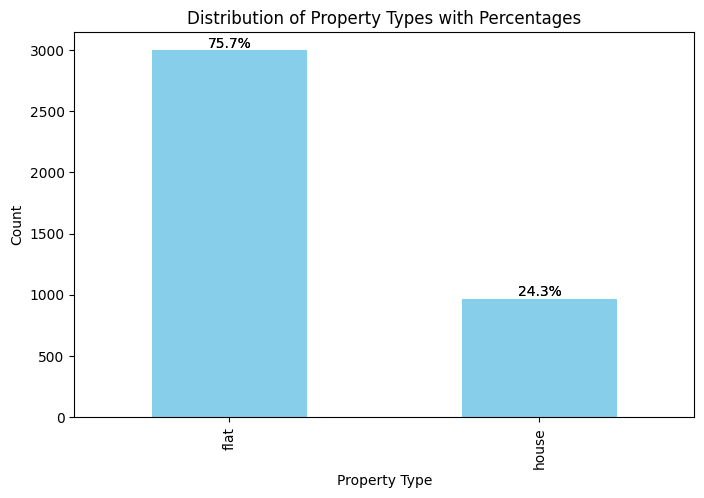

In [21]:
data['property_type'].value_counts().plot(kind='bar')

# Count the occurrences of each property type
value_counts = data['property_type'].value_counts()

# Create the bar plot
bars = value_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))

# Calculate total for percentage
total = value_counts.sum()

# Annotate each bar with its percentage
for bar in bars.patches:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', 
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types with Percentages')

# Show the plot
plt.show()

In [22]:
data['property_type'].isna().sum()

0

#### Observations:

- Flats are in majority around 75% and houses are in minority around 24%
- There are no missing values 

### `society` col

In [19]:
data['society'].value_counts().shape

(727,)

In [ ]:
# 727 categories --> high cardinality

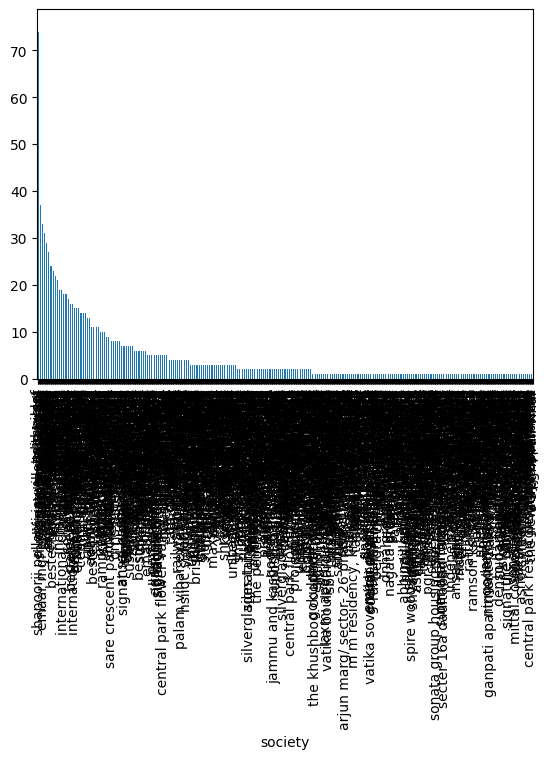

In [18]:
data['society'].value_counts().plot(kind='bar')
plt.show()

In [49]:
pd.set_option('display.max_rows', None)
temp_society = data['society'].value_counts()
temp_society

society
tulip violet                                         75
ss the leaf                                          74
shapoorji pallonji joyville gurugram                 45
signature global park                                37
dlf new town heights                                 37
shree vardhman victoria                              35
smart world orchard                                  33
smart world gems                                     33
emaar mgf emerald floors premier                     32
paras dews                                           31
dlf the ultima                                       31
m3m woodshire                                        30
dlf regal gardens                                    30
shree vardhman flora                                 29
la vida by tata housing                              28
godrej nature plus                                   27
signature global solera                              27
emaar gurgaon greens                    

In [48]:
temp_society.describe()

count    727.000000
mean       4.664374
std        7.310518
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       75.000000
Name: count, dtype: float64

In [50]:
data['society'].isna().sum()

570

In [52]:
data[data['property_type']=='house']['society'] 

1                                                     NaN
2                                      ansals palam vihar
8                                                     NaN
9                                                     NaN
10                                                    NaN
12                                       4s aradhya homes
13                                                    NaN
14                                                    NaN
18                                         unitech espace
19                                                    NaN
20                              vatika independent floors
21                                                    NaN
30                                                    NaN
31                                          rattan garden
36                                   eros rosewood villas
38                                        bhim garh kheri
40                                             ninex city
46            

### `sector` col

In [56]:
data['sector'].str.strip().value_counts()

sector
sohna                                                 163
sector 102                                            113
sector 85                                             110
sector 92                                             104
sector 69                                              94
sector 81                                              90
sector 90                                              90
sector 65                                              90
sector 109                                             88
sector 79                                              80
sector 83                                              69
sector 37d                                             68
sector 86                                              67
sector 104                                             66
sector 107                                             60
sector 108                                             59
sector 56                                              57
sector 

In [85]:
gurgaon_sectors = {
    "Sohna": "Sector 35",
    "Nirvana Country": "Sector 50",
    "Sector-33 Sohna": "Sector 33",
    "Palam Vihar": "Sector 23",
    "DLF Phase 2": "Sector 25",
    "DLF Phase 1": "Sector 28",
    "Sushant Lok Phase 1": "Sector 56",
    "Laxman Vihar": "Sector 4",
    "DLF Phase 4": "Sector 28",
    "DLF Phase 3": "Sector 24",
    "Sushant Lok Phase 3": "Sector 57",
    "DLF Phase 5": "Sector 54",
    "Gwal Pahari": "Sector 33",
    "Rajendra Park": "Sector 5",
    "Laxman Vihar Phase 2": "Sector 4",
    "Sohna Road": "Sector 49",
    "Uppals Southend": "Sector 49",
    "Ashok Vihar Phase 3 Extension": "Sector 52",
    "Ashok Vihar Phase 2": "Sector 52",
    "South City 1": "Sector 30",
    "Mehrauli Road": "Sector 27",
    "Dwarka Expressway": "Sector 113",
    "Palam Vihar Extension": "Sector 23",
    "C Block Sushant Lok Phase 1": "Sector 56",
    "Malibu Town": "Sector 47",
    "Mianwali Colony": "Sector 37",
    "Surat Nagar 1": "Sector 37",
    "New Colony": "Sector 37",
    "Rajiv Nagar": "Sector 37",
    "Ashok Vihar": "Sector 52",
    "Jacobpura": "Sector 39",
    "Jyoti Park": "Sector 37",
    "Manesar": "Sector 66",
    "Sushant Lok Phase 2": "Sector 57",
    "Saraswati Vihar": "Sector 56",
    "Subhash Nagar": "Sector 37",
    "New Palam Vihar": "Sector 23",
    "Dayanand Colony": "Sector 37",
    "Greenwood City": "Sector 45",
    "Chakkarpur": "Sector 28",
    "Arjun Nagar": "Sector 37",
    "Ansal Plaza": "Sector 14",
    "Valley View Estate": "Sector 49",
    "New": "Sector 49",
    "Shivpuri": "Sector 37",
    "Baldev Nagar": "Sector 37",
    "Suncity": "Sector 54",
    "Garhi Harsaru": "Sector 10",
    "Bhondsi": "Sector 10",
    "IMT Manesar": "Sector 66",
    "Vishnu Garden": "Sector 37",
    "Devilal Colony": "Sector 37",
    "Ravi Nagar": "Sector 37",
    "Krishna Colony": "Sector 37",
    "Dharam Colony": "Sector 37",
    "Madanpuri": "Sector 37",
    "Bhim Nagar": "Sector 37",
    "Surya Vihar": "Sector 37",
    "Adarsh Nagar": "Sector 37",
    "Shivaji Nagar": "Sector 37",
    "B Block Sushant Lok Phase 1": "Sector 56",
    "Maruti Kunj": "Sector 28",
    "A Block Sushant Lok Phase 1": "Sector 56",
    "Patel Nagar": "Sector 37",
    "MG Road": "Sector 28",
    "Gandhi Nagar": "Sector 37",
    "Prem Nagar": "Sector 37",
    "Laxmi Garden": "Sector 37",
    "Shakti Nagar": "Sector 37",
    "Faridabad Road": "Sector 37",
    "Nars": "Sector 37",
    "Farukhnagar": "Sector 37",
    "Bissar": "Sector 37",
    "Shankar Vihar": "Sector 37",
    "Rosewood": "Sector 37",
    "Manohar Nagar": "Sector 37",
    "Golf Course Road": "Sector 54",
    "Rajiv Chowk": "Sector 14",
    "Lajpat Nagar": "Sector 14",
    "Block A Surya Vihar": "Sector 37",
    "New Palam Vihar Phase 2": "Sector 23",
    "Golf Course Ext Road": "Sector 58",
    "Bhawani Enclave": "Sector 37",
    "Shanti Nagar": "Sector 37",
    "Sispal Vihar": "Sector 57",
    "Pratap Nagar": "Sector 37",
    "New Palam Vihar Phase 1": "Sector 23",
    "Sector-11 Sohna": "Sector 11",
    "Surat Nagar": "Sector 37",
    "New Basti": "Sector 37",
    "Iffco Chowk": "Sector 14",
    "Sheetla Colony": "Sector 37",
    "Acharya Puri": "Sector 37",
    "Sector-2 Sohna": "Sector 2",
    "Ambience Island": "Sector 24",
    "Samaspur": "Sector 37",
    "Daulatabad": "Sector 37",
    "Sohna Road": "Sector 49",
    "Sushant Lok": "Sector 56",
    "Hira Nagar": "Sector 37",
    "West Rajiv Nagar": "Sector 37",
    "Mohan Nagar": "Sector 37",
    "Surat Nagar Phase 2": "Sector 37",
    "Mayfield Garden": "Sector 48",
    "New Jyoti Park": "Sector 37",
    "Jacobpura near Sadar Bazar": "Sector 39",
    "Damdma": "Sector 37",
    "Sadar Bazar": "Sector 39",
    "Sector-7 Hous": "Sector 37",
    "Block H Ashok Vihar Phase III Extension": "Sector 52",
    "Block G Sector-57": "Sector 57",
    "Sector-5 Sohna": "Sector 5",
    "Sai Kunj": "Sector 37",
    "Shivji Park Colony": "Sector 37",
    "Mahalaxmi Garden, Rajendra Place": "Sector 5",
    "South City": "Sector 30",
    "Mahavir Pura": "Sector 37",
    "Alipur": "Sector 37",
    "Pataudi Road": "Sector 37",
    "Laxman Vihar, Railway Road": "Sector 4",
    "Huda Saraswati Vihar": "Sector 57",
    "Hsiidc Plot": "Sector 66",
    "Godrej Aria": "Sector 63",
    "B1 Block": "Sector 37",
    "New Colony": "Sector 37",
    "Gopal Nagar, Garhi Ghasita, Sonipat": "Sector 37",
    "Hno 13 Sagar Enclave Sura": "Sector 37",
    "Khandsa": "Sector 37",
    "Lucknow": "Sector 37",
    "Urban Estate": "Sector 37",
    "Ram Nagar": "Sector 37",
    "Tekchand Nagar": "Sector 37",
    "Ravi Nagar Basai Road": "Sector 37",
    "Anand Garden, Sector-105": "Sector 105",
    "Nirvana Country Pocket H": "Sector 50",
    "Civil L": "Sector 37",
    "ATS Marigold": "Sector 104",
    "Om Nagar": "Sector 37",
    "Kheri": "Sector 37",
    "Ansal's Palam Vihar": "Sector 23",
    "Dhankot": "Sector 37",
    "V Block DLF Phase 3": "Sector 24",
    "Devi Lal Colony Gali No 12 nr Omkar Public School": "Sector 37",
    "Sector-5 Sheetla Colony": "Sector 37",
    "Carterpuri Village": "Sector 37",
    "Part 3": "Sector 37",
    "Bhora Kalan": "Sector 37",
    "Vir Nagar": "Sector 37",
    "Old Delhi Road, Opp Sector-14": "Sector 14",
    "Saroop Garden Rajendra Park": "Sector 5",
    "Heritage City": "Sector 57",
    "Laxmna Vihar, Phase 2": "Sector 4",
    "Park View": "Sector 37",
    "Jat Colony, Fazilpur/Taj Nagar Road": "Sector 37",
    "Ashok Vihar Phase 3": "Sector 52",
    "G Block DLF City Phase 1": "Sector 24",
    "Bhimgarh Kheri Phase 3": "Sector 37",
    "Cyber City": "Sector 24",
    "Sec 3 Bhim Vihar Part 1 Bhimgher Kheri": "Sector 37",
    "BPTP": "Sector 66",
    "Naharpur Rupa": "Sector 66",
    "Rattan Garden": "Sector 37",
    "Rajiv Colony": "Sector 37",
    "Garauli Kalan": "Sector 37",
    "Ashok Vihar Phase I": "Sector 52",
    "Saraswati Enclave": "Sector 37",
    "Udyog Vihar Phase 1": "Sector 18",
    "Begampur Khatola": "Sector 37",
    "Sultanpur": "Sector 66",
    "Kanahi": "Sector 37",
    "Sector-35 Sohna": "Sector 35"
}


In [110]:
def map_sectors(row):
    for key, value in gurgaon_sectors.items():
        if key.strip().lower() in row.lower().strip():
            return value.strip().lower()
    return 'lil'

In [111]:
map_sectors('Anand')

'lil'

In [86]:
data['sector'].astype(str).apply(map_sectors).value_counts()

sector
sector 35                                              241
 sector 102                                            113
 sector 85                                             110
 sector 92                                             104
 sector 69                                              94
 sector 90                                              90
 sector 81                                              90
 sector 65                                              90
 sector 109                                             88
 sector 79                                              80
 sector 83                                              69
 sector 37d                                             68
 sector 86                                              67
 sector 104                                             66
 sector 107                                             60
 sector 108                                             59
 sector 95                                       